In [16]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

#https://coinmarketcap.com/

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',   # was 5000 but ust seeing top 15 for easier understanding of the data
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6244d1ec-bd9a-4f7b-826e-cbf7de585068',        #get  the key from https://pro.coinmarketcap.com/account
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [17]:
type(data)

dict

In [18]:
import pandas as pd

#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
#normalise and add the data to a df

df = pd.json_normalize(data['data'])

# adding the timestamp of it running to automate it
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971962e+07,1.971962e+07,False,NaN,1,NaN,NaN,None,2024-07-07T08:27:00.000Z,57436.345651,2.064985e+10,-43.7407,0.388266,1.440748,-6.426846,-19.254945,-7.829600,-19.359802,1.132623e+12,53.8339,1.206163e+12,None,2024-07-07T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977
1,1027,Ethereum,ETH,ethereum,9122,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202008e+08,1.202008e+08,True,NaN,2,NaN,NaN,None,2024-07-07T08:26:00.000Z,3006.224098,1.080444e+10,-40.7621,-0.075571,-0.119373,-11.303062,-21.122753,-0.001579,-15.710618,3.613504e+11,17.1697,3.613504e+11,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977
2,825,Tether USDt,USDT,tether,91096,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122238e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-07T08:26:00.000Z,1.000248,4.287002e+10,-37.0048,0.017706,0.025284,0.256706,0.077617,0.027081,0.039303,1.122516e+11,5.3337,1.161056e+11,None,2024-07-07T08:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 08:29:15.951977
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475827e+08,1.475827e+08,False,NaN,4,NaN,NaN,None,2024-07-07T08:26:00.000Z,508.465071,1.651874e+09,-14.6908,-0.579082,0.088744,-11.626708,-27.183854,-12.529942,-14.109332,7.504067e+10,3.5660,7.504067e+10,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.635494e+08,5.796875e+08,True,NaN,5,NaN,NaN,None,2024-07-07T08:26:00.000Z,139.076413,2.068265e+09,-33.3270,0.008209,1.180511,-1.127469,-19.067267,-5.315494,-23.528370,6.446879e+10,3.0633,8.062086e+10,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.372906e+10,3.372906e+10,False,NaN,6,NaN,NaN,None,2024-07-07T08:26:00.000Z,1.000163,3.511766e+09,-48.6548,0.026761,0.017612,0.023682,0.025210,0.006402,0.025038,3.373455e+10,1.6029,3.373455e+10,None,2024-07-07T08:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 08:29:15.951977
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-07T08:27:00.000Z,0.437248,7.057204e+08,-39.0991,-0.165457,0.901884,-7.761274,-16.539367,-16.328043,-27.677862,2.436477e+10,1.1581,4.372475e+10,None,2024-07-07T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506059e+09,5.108644e+09,True,NaN,8,3.414167e+09,2.565115e+10,None,2024-07-07T08:26:00.000Z,7.513152,2.925523e+08,-44.0788,-0.633982,-1.254904,-2.076084,-0.032064,32.744974,36.502496,1.882840e+10,0.8946,3.838202e+10,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-

In [79]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6244d1ec-bd9a-4f7b-826e-cbf7de585068',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    df = pd.concat([df, df2], ignore_index=True)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'#the path of the file should be depeding on where it is stored ', header='column_names')
    #else:
        #df.to_csv(r'#the path of the file should be depeding on where it is stored ', mode='a', header=False)

    #Then to read in the file: df = pd.read_csv(r'#the path of the file should be depeding on where it is stored ')

In [80]:
import os
from time import time
from time import sleep

for i in range(333): # 333 because we only have 333 runs per day on the website
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [81]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719621.00000,19719621.00000,False,NaN,1,NaN,NaN,None,2024-07-07T08:27:00.000Z,57436.34565,20649850326.08511,-43.74070,0.38827,1.44075,-6.42685,-19.25494,-7.82960,-19.35980,1132622967856.43018,53.83390,1206163258664.30005,None,2024-07-07T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
1,1027,Ethereum,ETH,ethereum,9122,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120200756.88517,120200756.88517,True,NaN,2,NaN,NaN,None,2024-07-07T08:26:00.000Z,3006.22410,10804436434.49880,-40.76210,-0.07557,-0.11937,-11.30306,-21.12275,-0.00158,-15.71062,361350411907.89374,17.16970,361350411907.89001,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
2,825,Tether USDt,USDT,tether,91096,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112223789756.27960,116076856617.27618,True,NaN,3,NaN,NaN,None,2024-07-07T08:26:00.000Z,1.00025,42870022310.42789,-37.00480,0.01771,0.02528,0.25671,0.07762,0.02708,0.03930,112251613824.54709,5.33370,116105635990.97000,None,2024-07-07T08:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 08:29:15.951977,NaT
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582738.69334,147582738.69334,False,NaN,4,NaN,NaN,None,2024-07-07T08:26:00.000Z,508.46507,1651873973.24503,-14.69080,-0.57908,0.08874,-11.62671,-27.18385,-12.52994,-14.10933,75040667769.53671,3.56600,75040667769.53999,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,463549440.45134,579687524.12199,True,NaN,5,NaN,NaN,None,2024-07-07T08:26:00.000Z,139.07641,2068265407.83618,-33.32700,0.00821,1.18051,-1.12747,-19.06727,-5.31549,-23.52837,64468793590.00589,3.06330,80620861720.67000,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33729061980.61629,33729061980.61629,False,NaN,6,NaN,NaN,None,2024-07-07T08:26:00.000Z,1.00016,3511766288.27938,-48.65480,0.02676,0.01761,0.02368,0.02521,0.00640,0.02504,33734550477.11171,1.60290,33734550477.11000,None,2024-07-07T08:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 08:29:15.951977,NaT
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55723063839.00000,99987471767.00000,False,NaN,7,NaN,NaN,None,2024-07-07T08:27:00.000Z,0.43725,705720380.48452,-39.09910,-0.16546,0.90188,-7.76127,-16.53937,-16.32804,-27.67786,24364772249.02441,1.15810,43724753397.30000,None,2024-07-07T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506058596.05905,5108643622.63834,True,NaN,8,3414166606.00000,25651153664.40747,None,2024-07-07T08:26:00.000Z,7.51315,292552256.50749,-44.07880,-0.63398,-1.25490,-2.07608,-0.03206,32.74497,36.50250,18828

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [44]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719621.00000,19719621.00000,False,NaN,1,NaN,NaN,None,2024-07-07T08:27:00.000Z,57436.34565,20649850326.08511,-43.74070,0.38827,1.44075,-6.42685,-19.25494,-7.82960,-19.35980,1132622967856.43018,53.83390,1206163258664.30005,None,2024-07-07T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
1,1027,Ethereum,ETH,ethereum,9122,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120200756.88517,120200756.88517,True,NaN,2,NaN,NaN,None,2024-07-07T08:26:00.000Z,3006.22410,10804436434.49880,-40.76210,-0.07557,-0.11937,-11.30306,-21.12275,-0.00158,-15.71062,361350411907.89374,17.16970,361350411907.89001,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
2,825,Tether USDt,USDT,tether,91096,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112223789756.27960,116076856617.27618,True,NaN,3,NaN,NaN,None,2024-07-07T08:26:00.000Z,1.00025,42870022310.42789,-37.00480,0.01771,0.02528,0.25671,0.07762,0.02708,0.03930,112251613824.54709,5.33370,116105635990.97000,None,2024-07-07T08:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 08:29:15.951977,NaT
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582738.69334,147582738.69334,False,NaN,4,NaN,NaN,None,2024-07-07T08:26:00.000Z,508.46507,1651873973.24503,-14.69080,-0.57908,0.08874,-11.62671,-27.18385,-12.52994,-14.10933,75040667769.53671,3.56600,75040667769.53999,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,463549440.45134,579687524.12199,True,NaN,5,NaN,NaN,None,2024-07-07T08:26:00.000Z,139.07641,2068265407.83618,-33.32700,0.00821,1.18051,-1.12747,-19.06727,-5.31549,-23.52837,64468793590.00589,3.06330,80620861720.67000,None,2024-07-07T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33729061980.61629,33729061980.61629,False,NaN,6,NaN,NaN,None,2024-07-07T08:26:00.000Z,1.00016,3511766288.27938,-48.65480,0.02676,0.01761,0.02368,0.02521,0.00640,0.02504,33734550477.11171,1.60290,33734550477.11000,None,2024-07-07T08:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 08:29:15.951977,NaT
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55723063839.00000,99987471767.00000,False,NaN,7,NaN,NaN,None,2024-07-07T08:27:00.000Z,0.43725,705720380.48452,-39.09910,-0.16546,0.90188,-7.76127,-16.53937,-16.32804,-27.67786,24364772249.02441,1.15810,43724753397.30000,None,2024-07-07T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 08:29:15.951977,NaT
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506058596.05905,5108643622.63834,True,NaN,8,3414166606.00000,25651153664.40747,None,2024-07-07T08:26:00.000Z,7.51315,292552256.50749,-44.07880,-0.63398,-1.25490,-2.07608,-0.03206,32.74497,36.50250,18828

In [82]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp', 'Timestamp'],
      dtype='object')

In [83]:
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d',]].mean()

In [84]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.33721,1.73034,-6.30238,-19.08499,-7.56328,-19.63012
Ethereum,0.14680,0.28923,-11.19401,-21.01352,0.43616,-16.04998
Tether USDt,0.00374,-0.00899,0.24983,0.06298,-0.00095,0.00661
BNB,0.26019,0.28614,-11.47100,-27.34892,-12.26695,-13.91917
Solana,0.23081,1.29802,-1.25230,-19.06615,-4.88904,-23.74384
USDC,0.00617,-0.00551,0.01866,0.00471,-0.00954,-0.00889
XRP,0.11505,1.16031,-7.74698,-16.49337,-16.27826,-27.88830
Toncoin,-0.07210,-0.99677,-2.23688,-0.02899,33.18608,34.62724
Dogecoin,0.18270,1.65805,-10.46606,-31.64085,-25.76648,-46.78915


In [85]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.33721
             quote.USD.percent_change_24h     1.73034
             quote.USD.percent_change_7d     -6.30238
             quote.USD.percent_change_30d   -19.08499
             quote.USD.percent_change_60d    -7.56328
             quote.USD.percent_change_90d   -19.63012
Ethereum     quote.USD.percent_change_1h      0.14680
             quote.USD.percent_change_24h     0.28923
             quote.USD.percent_change_7d    -11.19401
             quote.USD.percent_change_30d   -21.01352
             quote.USD.percent_change_60d     0.43616
             quote.USD.percent_change_90d   -16.04998
Tether USDt  quote.USD.percent_change_1h      0.00374
             quote.USD.percent_change_24h    -0.00899
             quote.USD.percent_change_7d      0.24983
             quote.USD.percent_change_30d     0.06298
             quote.USD.percent_change_60d    -0.00095
             quote.USD.percent_change_90

In [86]:
type(df4)

pandas.core.series.Series

In [87]:
df5 = df4.to_frame(name='values')       #change the series type of df4 to df and have the column named as values
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.33721
            quote.USD.percent_change_24h   1.73034
            quote.USD.percent_change_7d   -6.30238
            quote.USD.percent_change_30d -19.08499
            quote.USD.percent_change_60d  -7.56328
            quote.USD.percent_change_90d -19.63012
Ethereum    quote.USD.percent_change_1h    0.14680
            quote.USD.percent_change_24h   0.28923
            quote.USD.percent_change_7d  -11.19401
            quote.USD.percent_change_30d -21.01352
            quote.USD.percent_change_60d   0.43616
            quote.USD.percent_change_90d -16.04998
Tether USDt quote.USD.percent_change_1h    0.00374
            quote.USD.percent_change_24h  -0.00899
            quote.USD.percent_change_7d    0.24983
            quote.USD.percent_change_30d   0.06298
            quote.USD.percent_change_60d  -0.00095
            quote.USD.percent_change_90d   0.00661
BNB         quote.USD.percent_change_1h    0.26019
            quote.USD.percent_change_24h   0.28614
            quote.USD.percent_change_7d  -11.47100
            quote.USD.percent_change_30d -27.34892
            quote.USD.percent_change_60d -12.26695
            quote.USD.percent_change_90d -13.91917
Solana      quote.USD.percent_change_1h    0.23081
            quote.USD.percent_change_24h   1.29802
            quote.USD.percent_change_7d   -1.25230
            quote.USD.percent_change_30d -19.06615
            quote.USD.percent_change_60d  -4.88904
            quote.USD.percent_change_90d -23.74384
USDC        quote.USD.percent_change_1h    0.00617
            quote.USD.percent_change_24h  -0.00551
            quote.USD.percent_change_7d    0.01866
            quote.USD.percent_change_30d   0.00471
            quote.USD.percent_change_60d  -0.00954
            quote.USD.percent_change_90d  -0.00889
XRP         quote.USD.percent_change_1h    0.11505
            quote.USD.percent_change_24h   1.16031
            quote.USD.percent_change_7d   -7.74698
            quote.USD.percent_change_30d -16.49337
            quote.USD.percent_change_60d -16.27826
            quote.USD.percent_change_90d -27.88830
Toncoin     quote.USD.percent_change_1h   -0.07210
            quote.USD.percent_change_24h  -0.99677
            quote.USD.percent_change_7d   -2.23688
            quote.USD.percent_change_30d  -0.02899
            quote.USD.percent_change_60d  33.18608
            quote.USD.percent_change_90d  34.62724
Dogecoin    quote.USD.percent_change_1h    0.18270
            quote.USD.percent_change_24h   1.65805
            quote.USD.percent_change_7d  -10.46606
            quote.USD.percent_change_30d -31.64085
            quote.USD.percent_change_60d -25.76648
            quote.USD.percent_change_90d -46.78915
Cardano     quote.USD.percent_change_1h   -0.14081
            quote.USD.percent_change_24h   3.79104
            quote.USD.percent_change_7d   -5.68823
            quote.USD.percent_change_30d -21.40045
            quote.USD.percent_change_60d -17.33873
            quote.USD.percent_change_90d -39.82951
TRON        quote.USD.percent_change_1h    0.15469
            quote.USD.percent_change_24h   0.94511
            quote.USD.percent_change_7d    4.03134
            quote.USD.percent_change_30d  13.98647
            quote.USD.percent_change_60d   6.85978
            quote.USD.percent_change_90d   6.75756
Avalanche   quote.USD.percent_change_1h    0.19442
            quote.USD.percent_change_24h   3.75037
            quote.USD.percent_change_7d   -6.45173
            quote.USD.percent_change_30d -26.55196
            quote.USD.percent_change_60d -23.58511
            quote.USD.percent_change_90d -47.17383
Shiba Inu   quote.USD.percent_change_1h    0.23387
            quote.USD.percent_change_24h   6.41775
            quote.USD.percent_change_7d   -4.01869
            quote.USD.percent_change_30d -35.07894
            quote.USD.percent_change_60d -28.00319
            quo

In [88]:
df5.count()

values    90
dtype: int64

In [89]:
#Because of how it's structured above we need to set an index.
#So I'm going to create a range and pass that as the dataframe.

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.33721
1,Bitcoin,quote.USD.percent_change_24h,1.73034
2,Bitcoin,quote.USD.percent_change_7d,-6.30238
3,Bitcoin,quote.USD.percent_change_30d,-19.08499
4,Bitcoin,quote.USD.percent_change_60d,-7.56328
5,Bitcoin,quote.USD.percent_change_90d,-19.63012
6,Ethereum,quote.USD.percent_change_1h,0.14680
7,Ethereum,quote.USD.percent_change_24h,0.28923
8,Ethereum,quote.USD.percent_change_7d,-11.19401
9,Ethereum,quote.USD.percent_change_30d,-21.01352


In [90]:
df7 = df6.rename(columns={'level_1': 'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.33721
1,Bitcoin,quote.USD.percent_change_24h,1.73034
2,Bitcoin,quote.USD.percent_change_7d,-6.30238
3,Bitcoin,quote.USD.percent_change_30d,-19.08499
4,Bitcoin,quote.USD.percent_change_60d,-7.56328
5,Bitcoin,quote.USD.percent_change_90d,-19.63012
6,Ethereum,quote.USD.percent_change_1h,0.14680
7,Ethereum,quote.USD.percent_change_24h,0.28923
8,Ethereum,quote.USD.percent_change_7d,-11.19401
9,Ethereum,quote.USD.percent_change_30d,-21.01352


In [91]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,0.33721
1,Bitcoin,24h,1.73034
2,Bitcoin,7d,-6.30238
3,Bitcoin,30d,-19.08499
4,Bitcoin,60d,-7.56328
5,Bitcoin,90d,-19.63012
6,Ethereum,1h,0.14680
7,Ethereum,24h,0.28923
8,Ethereum,7d,-11.19401
9,Ethereum,30d,-21.01352


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

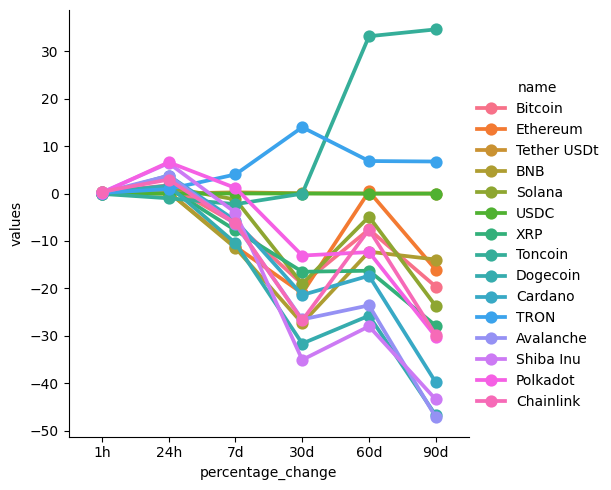

In [93]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')

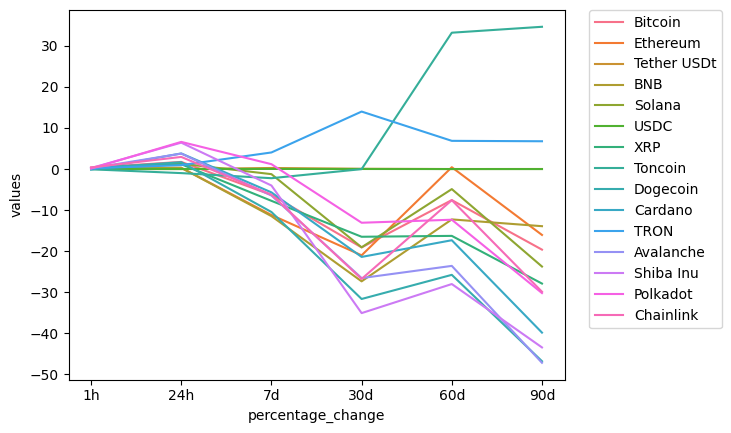

In [102]:
sns.lineplot(x='percentage_change', y='values', hue='name', data = df7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [106]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,57436.34565,2024-07-07 08:29:15.951977
15,Bitcoin,57455.08635,NaT
30,Bitcoin,57474.71220,NaT
45,Bitcoin,57476.30948,NaT
60,Bitcoin,57467.55769,NaT
75,Bitcoin,57467.55769,NaT
90,Bitcoin,57497.42137,NaT
105,Bitcoin,57568.01236,2024-07-07 09:20:04.889309
120,Bitcoin,57586.14572,2024-07-07 09:21:05.189456
135,Bitcoin,57583.52718,2024-07-07 09:22:05.479395


In [108]:
df10_subset = df10.iloc[7:12]
df10_subset

,name,quote.USD.price,timestamp
105,Bitcoin,57568.01236,2024-07-07 09:20:04.889309
120,Bitcoin,57586.14572,2024-07-07 09:21:05.189456
135,Bitcoin,57583.52718,2024-07-07 09:22:05.479395
150,Bitcoin,57579.14111,2024-07-07 09:23:05.759700
165,Bitcoin,57589.55730,2024-07-07 09:24:06.050645


(array([19911.38888889, 19911.38923611, 19911.38958333, 19911.38993056,
        19911.39027778, 19911.390625  , 19911.39097222, 19911.39131944,
        19911.39166667]),
 [Text(19911.38888888889, 0, '09:20:00'),
  Text(19911.38923611111, 0, '09:20:30'),
  Text(19911.389583333334, 0, '09:21:00'),
  Text(19911.389930555557, 0, '09:21:30'),
  Text(19911.390277777777, 0, '09:22:00'),
  Text(19911.390625, 0, '09:22:30'),
  Text(19911.390972222223, 0, '09:23:00'),
  Text(19911.391319444443, 0, '09:23:30'),
  Text(19911.391666666666, 0, '09:24:00')])

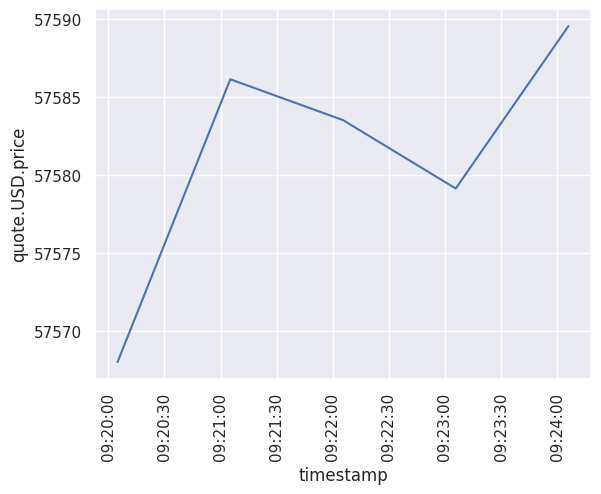

In [112]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10_subset)
plt.xticks(rotation=90)